C:\Users\pratu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


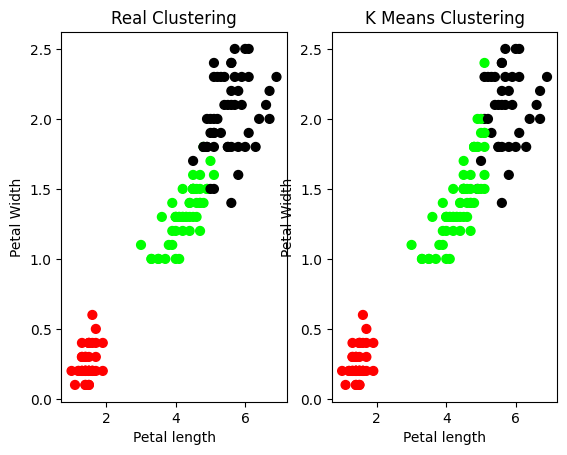

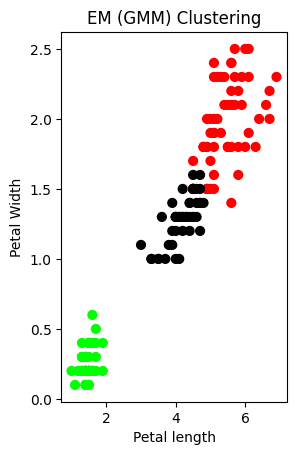

Actual Target is:
 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Targets, Length: 150, dtype: int32
K Means:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
EM (GMM):
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [4]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import sklearn.metrics as sm

import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

colormap = np.array(['red','lime','black'])

plt.subplot(1,2,1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clustering')
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
model1 = KMeans(n_clusters=3)
model1.fit(x)

plt.subplot(1,2,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model1.labels_], s=40)
plt.title('K Means Clustering')
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.show()

model2 = GaussianMixture(n_components=3)
model2.fit(x)
plt.subplot(1,2,1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model2.predict(x)], s=40)
plt.title('EM (GMM) Clustering')
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.show()

# K-Means classification
kmeans_classification = model1.labels_

# GMM classification
gmm_classification = model2.predict(x)

# Print the classification results
print("Actual Target is:\n", y.Targets)
print("K Means:\n", kmeans_classification)
print("EM (GMM):\n", gmm_classification)
